# PAIRS TRADING

Pairs trading is **a popular strategy in financial markets** used to exploit temporary divergences in the prices of related assets. 

This notebook aims to provide a comprehensive analysis of pairs trading by leveraging historical price data for two assets. It covers **data management, algorithm implementation** (including spread calculation, linear regression, and Kalman filtering), **and visualization of trading signals**. 

Through this analysis, readers will gain insights into the pairs trading strategy and learn **how to apply it using Q kdb+**. (With a little touch of python)

## 1. Data Management

In [5]:
// Extracting data
EWAt: flip `date`high`low`close`open`volume!("DFFFFJ";",") 0: `:EWA2.csv
EWCt: flip `date`high`low`close`open`volume!("DFFFFJ";",") 0: `:EWC2.csv

// Getting prices (COMO LOS GRAFICO SOBRE EL TIEMPO)
priceX: exec log close from EWCt
priceY: exec log close from EWAt


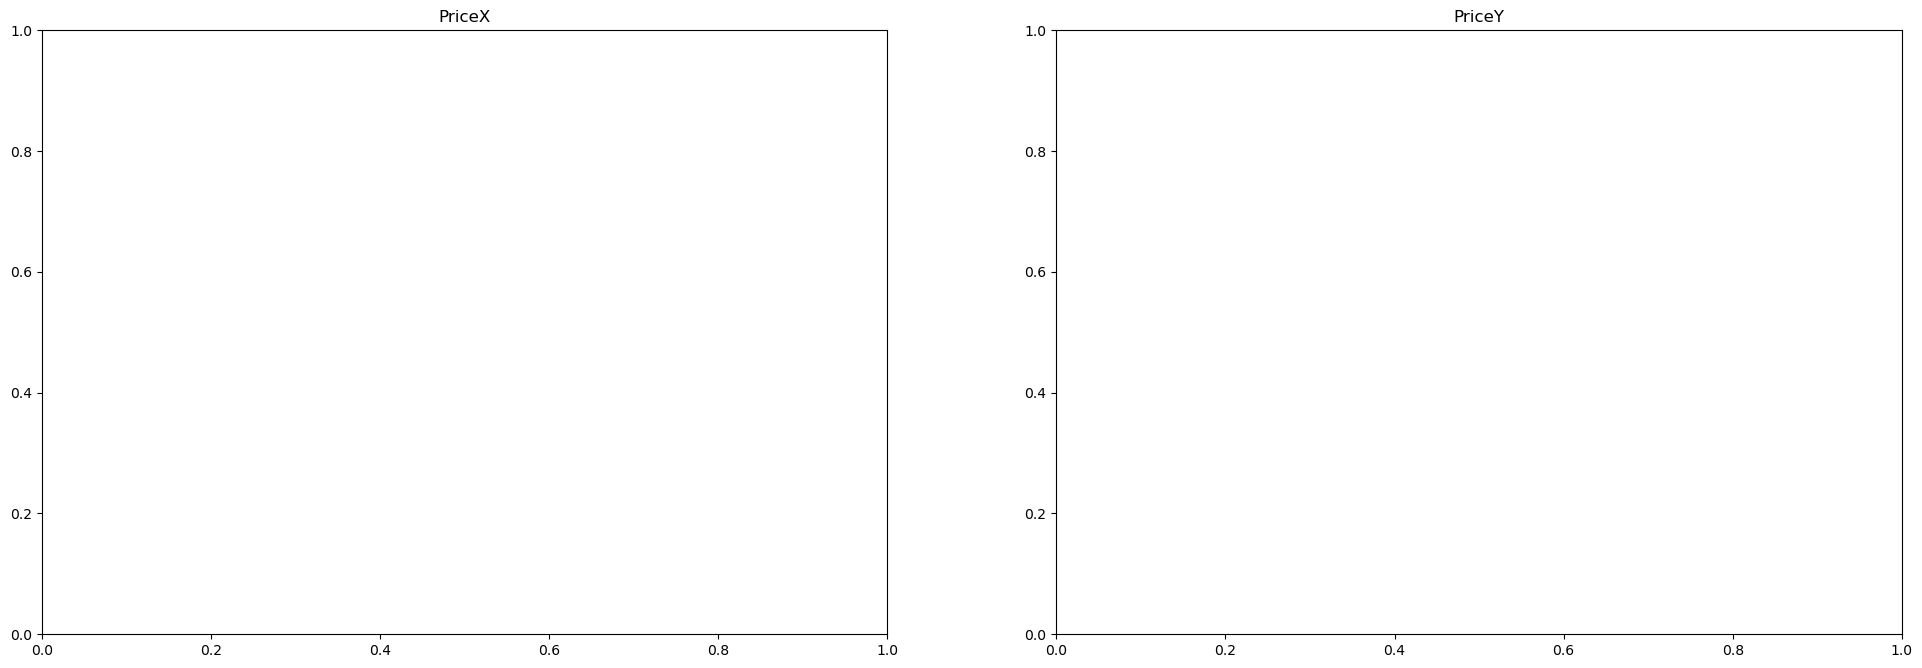

In [20]:
\l p.q
plt:.p.import[`matplotlib;`:pyplot]
plts:plt[`:subplots;<;pykwargs `ncols`figsize`dpi!(2;24 8;100)]
.p.wrap[plts[1;0]][`:set_title]"PriceX";
.p.wrap[plts[1;1]][`:set_title]"PriceY";
plt[`:show][];

## 2. Algorithm Implementation



In [23]:
// OPTIONAL: Check Stationarity and Cointegration - Python

// Applying linear regression - Python
lsfit:{(enlist y) lsq x xexp/: til 1+z}
fitted: raze lsfit[priceY;priceX;1]
yPred: priceX*/1#fitted+/-1#fitted

// Constructing spreads
spreads: priceY - (priceX*/1#fitted-/-1#fitted)

mean: avg spreads
up: mean + 1.96*dev spreads
low: mean - 1.96*dev spreads
`mean`up`low!(mean;up;low)

mean| 1.788495
up  | 2.180308
low | 1.396682


In [38]:
// Kalman Filter
// Function to make I
eye:{(2#x)#1f,x#0}
trans_cov: eye[2] * 1e-5 % (1-1e-5)

// Use python for KalmanFilter

// Calculate new spread with new alpha and beta